# <center>💎 Walmart Data Project 💎<center>

![SegmentLocal](walmart-store.gif "segment")

# 1. Introduction

Welcome to Walmart! How may I help you today? 

Oh, you're looking for vertical monitors? Come right this way! 

Say, you wouldn't happen to be one of those **data analysts** I keep hearing about? 

*Oh, you are!?* 

Actually, in that case, I will be needing help from you! You see, we've got a really **big** problem on our hands...

![SegmentLocal](problem.gif "segment")

Ok, here's the dealio...

As one of the largest retailers on Earth, we get millions of customers walking in through the door each day. Normally, this number is very steady.

But as you can imagine, during holidays and certain events, we run **huge promotions**, which as you can guess has an impact on demand.

In fact, here's what the store looked like during our Black Friday sale...

![SegmentLocal](blackfriday.gif "segment")

![SegmentLocal](oh-lord-walmart.gif "segment")

Our main issue is that we run into unforeseen demands, and thus run out of stock, due to our wonky machine learning algorithms.

**What we need is a way to predict sales and demand accurately**. 

That way, we can be sure to have enough stock on hand to match demand, which will maximize profits!

To be specific, we want to know whether certain factors such as holidays, temperature, CPI, gas prices, and so on can be good predictors for future sales.

# 2. Looking at the data

![SegmentLocal](look.gif "segment")

Let's begin by taking a look at the data.

FYI: This is historical data that covers sales from 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

**Store** - the store number

**Date** - the week of sales

**Weekly_Sales** - sales for the given store

**Holiday_Flag** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature** - Temperature on the day of sale

**Fuel_Price** - Cost of fuel in the region

**CPI** – Prevailing consumer price index

**Unemployment** - Prevailing unemployment rate

Holiday Events:

**Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12

**Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12

**Thanksgiving/Black Friday**: 26-Nov-10, 25-Nov-11

**Pre-Christmas**: 17-Dec-2010, 16-Dec-2011

**Christmas**: 24-Dec-2010, 23-Dec-2011

**Boxing Day**: 31-Dec-2010, 30-Dec-2011

Seems like we are missing the winter holiday events in 2012. Duly noted!

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Walmart_Store_sales.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
stores = df["Store"].value_counts()
stores # counting how many data points for each store

4     143
2     143
10    143
14    143
18    143
22    143
26    143
30    143
34    143
38    143
42    143
3     143
7     143
11    143
15    143
19    143
23    143
27    143
31    143
35    143
39    143
6     143
45    143
8     143
41    143
12    143
16    143
20    143
24    143
28    143
32    143
36    143
40    143
44    143
1     143
5     143
9     143
13    143
17    143
21    143
25    143
29    143
33    143
37    143
43    143
Name: Store, dtype: int64

Looks like we have 143 slices of data for a grand total of 45 different stores. Not bad!

In [4]:
df.isnull().sum() # checking to see if there is any null data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

No null values--that's what we like to see 😎

In [5]:
df.duplicated().sum() # checking to see if there is any duplicated data

0

Every bit of data in our data set is a unique special snowflake--just like you 😉

In [6]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Everything is looking good so far. Let's get onto the nitty-gritty!

![SegmentLocal](party-drinks.gif "segment")

# 3. Analysis

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
sales_weekly = df.groupby(["Date"])["Weekly_Sales"].sum()
average_sales = sales_weekly.mean()
average_sales

47113419.49027974

Here we can see that the average total weekly sales across all stores for each week is $47,113,419.49

Next, I want to confirm that holidays result in more sales than non-holidays. This will be our first clue that gets our analysis-ball rolling.

Let's recall which dates correspond to holidays:

**Super Bowl**: 12-Feb-10, 11-Feb-11, 10-Feb-12

**Labour Day**: 10-Sep-10, 9-Sep-11, 7-Sep-12

**Thanksgiving/Black Friday**: 26-Nov-10, 25-Nov-11

**Pre-Christmas**: 17-Dec-2010, 16-Dec-2011

**Christmas**: 24-Dec-2010, 23-Dec-2011

**Boxing Day**: 31-Dec-2010, 30-Dec-2011

First, I want to see the total sales volume for each holiday, and the average.


In [9]:
a=df[df['Date']== '12-02-2010']['Weekly_Sales'].sum()
b=df[df['Date']== '11-02-2011']['Weekly_Sales'].sum()
c=df[df['Date']== '10-02-2012']['Weekly_Sales'].sum()
super_bowl = a+b+c

a1=df[df['Date']== '10-09-2010']['Weekly_Sales'].sum()
b1=df[df['Date']== '09-09-2011']['Weekly_Sales'].sum()
c1=df[df['Date']== '07-09-2012']['Weekly_Sales'].sum() 
labour_day = a1+b1+c1

a2=df[df['Date']== '26-11-2010']['Weekly_Sales'].sum()
b2=df[df['Date']== '25-11-2011']['Weekly_Sales'].sum()
thanksgiving = a2+b2

a3=df[df['Date']== '17-12-2010']['Weekly_Sales'].sum()
b3=df[df['Date']== '16-12-2011']['Weekly_Sales'].sum()
pre_xmas = a3+b3

a4=df[df['Date']== '24-12-2010']['Weekly_Sales'].sum()
b4=df[df['Date']== '23-12-2011']['Weekly_Sales'].sum()
xmas = a4+b4

a5=df[df['Date']== '31-12-2010']['Weekly_Sales'].sum()
b5=df[df['Date']== '30-12-2011']['Weekly_Sales'].sum()
boxing_day = a5+b5

print('super_bowl : ',super_bowl)
print('labour_day : ',labour_day)
print('thanksgiving : ',thanksgiving)
print('pre_xmas : ',pre_xmas)
print('xmas : ',xmas)
print('boxing_day : ',boxing_day)

print(' ')

print('super_bowl avg: ',super_bowl/3)
print('labour_day avg: ',labour_day/3)
print('thanksgiving avg: ',thanksgiving/2)
print('pre_xmas avg: ',pre_xmas/2)
print('xmas avg: ',xmas/2)
print('boxing_day avg: ',boxing_day/2)

super_bowl :  145682278.34000003
labour_day :  140727684.68
thanksgiving :  132414608.5
pre_xmas :  121906495.78999999
xmas :  157929656.90999997
boxing_day :  86474980.04
 
super_bowl avg:  48560759.44666668
labour_day avg:  46909228.22666667
thanksgiving avg:  66207304.25
pre_xmas avg:  60953247.894999996
xmas avg:  78964828.45499998
boxing_day avg:  43237490.02


Some interesting things here: we can see that despite only having two years worth of sales data for thanksgiving, pre_xmas and xmas, they are on par with the total sales of super_bowl, and labour_day which both have three years worth of sales!

When we look at the average, our suspicions are confirmed: Black Friday and Christmas time are when customers go bananas $$$.

Let's visualize this.

In [10]:
# Converting our data into a dataframe for visualization analysis using seaborn.
# I'm also adding another row for the average sales of each week.

d = {'Holiday': ['super_bowl avg',
              'labour_day avg',
              'thanksgiving avg',
              'pre_xmas avg',
              'xmas avg',
              'boxing_day avg',
              'normal avg'], 
     'Sales': [48560759.45,
               46909228.23,
               66207304.25,
               60953247.89,
               78964828.45,
               43237490.02,
               47113419.49]}
holiday = pd.DataFrame(data=d)
holiday.head(7)

,Holiday,Sales
0,super_bowl avg,48560759.45
1,labour_day avg,46909228.23
2,thanksgiving avg,66207304.25
3,pre_xmas avg,60953247.89
4,xmas avg,78964828.45
5,boxing_day avg,43237490.02
6,normal avg,47113419.49


<AxesSubplot:xlabel='Holiday', ylabel='Sales'>

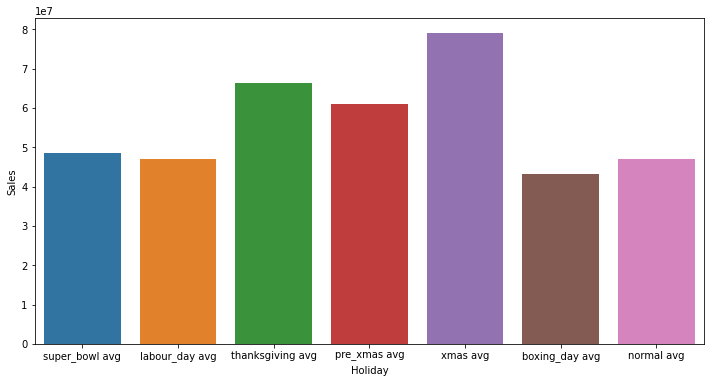

In [11]:
plt.figure(figsize=(12,6))

sns.barplot(x='Holiday', y='Sales', data=holiday)

Seems that Christmas, Thanksgiving (Black Friday), and the Pre-Christmas run-up are the most significant holidays that impact sales.

Visually, it looks like the Super Bowl and Labour Day holidays have little to no impact on sales.

One interesting thing to note is that it seems like Boxing Day week has less sales than the average week. Perhaps customers are all burnt out from shopping! (or maybe they get severe anxiety when they see their credit card statement...)

(everyone's credit card post-Xmas:)

![SegmentLocal](nomore.gif "segment")

# 4. Adding a New Column

Now, my ultimate goal is to do is run a linear regression analysis. 

The only thing is, is that in our current dataframe, there is only a column that specifies whether or not a particular week is a holiday ("1") or not ("0"). Way too vague for our purposes! We want to know *which* holidays impact our sales--not just holidays in general. That's why we deliberately looked at specific holidays in the previous section.

For this, we will need to create some new columns and then create dummy values.

In [12]:
# Let's create a function that will tell us which holidays are which and when.

def holiday(x):
    if x=='12-02-2010' or x=='11-02-2011' or x=='10-02-2012':
        return 'Super Bowl'
    elif x=='10-09-2010' or x=='09-09-2011' or x=='07-09-2012':
        return 'Labour Day'
    elif x=='26-11-2010' or x=='25-11-2011':
        return 'Thanksgiving'
    elif x=='17-12-2010' or x=='16-12-2011':
        return 'Pre-Xmas'
    elif x=='24-12-2010' or x== '23-12-2011':
        return 'Xmas'
    elif x=='31-12-2010' or x== '30-12-2011':
        return 'Boxing Day'
    else: return 'No Holiday'

df["Holiday"] = df["Date"].apply(holiday)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,No Holiday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,No Holiday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,No Holiday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,No Holiday
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,No Holiday
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,No Holiday
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,No Holiday
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,No Holiday


Now let's double check to make sure there are as many holidays as we counted before.

In [13]:
df["Holiday"].value_counts()

No Holiday      5805
Super Bowl       135
Labour Day       135
Pre-Xmas          90
Xmas              90
Boxing Day        90
Thanksgiving      90
Name: Holiday, dtype: int64

In [14]:
# We know there are 45 stores, so we need to divide the Labour Day and Super Bowl totals by 45.
135 / 45 

3.0

In [15]:
# Same goes for the other holidays.
90 / 45

2.0

Perfecto! Now let's get those dummy variables.

In [15]:
dummy = pd.get_dummies(df['Holiday'])

dummy

KeyboardInterrupt: 

In [ ]:
df = pd.concat([df, dummy], axis=1)
df = df.drop('Holiday',axis = 1)

df

Looking good!

![SegmentLocal](lookingood.gif "segment")

# 5. Linear Regression

Ok... now let's get to the fun part.

First, let's see the correlations amongst our data.

In [ ]:
plt.figure(figsize = (15,12))
sns.heatmap(df.corr(),cmap='RdYlBu', annot=True)

One final step to our dataframe before we get going, which is to one hot encode the "store" column.

In [ ]:
y = pd.get_dummies(df['Store'])
df = df.drop('Store',axis = 1)

# Join the dummy variables to our previous data set
df = df.join(y)

Next let's run our linear regression analysis.

In [ ]:
x=df.drop(columns=['Weekly_Sales','Date'],axis=1) #independent
y=df['Weekly_Sales'] #dependent

lin_reg = sm.OLS(y, x)
reg_results = lin_reg.fit()
print(reg_results.summary())

Amazing! That is a high R-squared value.

But, it looks like CPI has a relatively huge p-value, so let's kick it out. 

In [ ]:
x2=df.drop(columns=['Weekly_Sales','Date','CPI'],axis=1) #independent
y2=df['Weekly_Sales'] #dependent

lin_reg2 = sm.OLS(y2, x2)
reg_results2 = lin_reg2.fit()
print(reg_results2.summary())

Pretty much the same! But now all of our independent variables have low p-values, so we can be more confident in our model!

![SegmentLocal](awesome-grandma.gif "segment")

# 6. Model Visuals

Based on code from another contributor, found here: https://www.kaggle.com/myselfpnkj/walmart-sales-prediction-91-9-accurcey-rate

I liked the visuals that this person used. The data is based on my own project above. I was able to improve on this author's accuracy rate (their 91.9% vs. my own 95.4%).

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x2,y2,train_size=0.75,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
print('Accuracy of model is: ' + str(round(r2*100,2)) + '%') # Its R square value
print('Mean Square Error :',MSE)

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()

In [ ]:
y_error=y_test-y_predict
accuracy=round((y_predict-y_test)*100/y_test,2)

error_data=pd.DataFrame(np.array([y_test,y_predict,y_error,accuracy
                                 ])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accuracy%'})
error_data

In [ ]:
plt.figure(figsize=(17,5))
no_of_data_show =25 # type here how many data you want to show
predicted = list(error_data['Predicted'])[0:no_of_data_show] 
actual = list(error_data['Actual'])[0:no_of_data_show]

n=len(predicted) 
r = np.arange(n)
width = 0.25

  
plt.bar(r, predicted, color = 'y',width = width, edgecolor = 'black',label='Predicted')
plt.bar(r + width, actual, color = 'g',width = width, edgecolor = 'black',label='Actual')
  
plt.xlabel("No. of Datapoints",fontsize=12,weight="bold")
plt.ylabel("Data Range",fontsize=12,weight="bold")
plt.title("Data Accuracy\n",fontsize=20,weight="bold")
plt.legend(fontsize=15)
plt.grid(color='b', linestyle='-', linewidth=0.9)
plt.xticks(np.arange(0, no_of_data_show, step=1)) 
plt.show()

# 7. Takeaways

Here are the key takeaways from our analysis, in bullet point form:

1. The first thing is that each store brings in wildly different average sales per week. I didn't realize this at first, but this makes total sense: a store located in the middle of downtown New York, for example, will pull **much** more sales than one in the middle of the countryside. So the first step in predicting sales is to know which store we are talking about.

2. Secondly, we were right to hypothesize that holidays do affect sales, but some more than others. Specifically, only Thanksgiving, Pre-Christmas and Christmas holiday weeks affected sales to a significant degree.

3. Things like temperature, fuel price and unemployment do seem to affect sales. Temperature is kind of a given, because low temperature is linked to the holiday season, which is when the sales start to explode. As for the latter two, it makes perfect sense that with higher fuel prices and unemployment, people have less disposable income, and thus feel less inclined to go shopping for things they don't need. CPI not being relevant is surprising, however, but if I had to speculate, perhaps rising prices alone don't necessarily deter people away from spending.

**In conclusion: in order to make sure we are stocked up to meet our customers' demands, we have designed a model that allows us to forecast future sales. Our model pays special attention to store number, holidays, temperature, fuel price, and unemployment numbers to generate predictions.**

![SegmentLocal](welcome.gif "segment")